In [ ]:
!pip install qiskit

In [ ]:
import qiskit
# Enable your account on Qiskit, replace 'My_API_Token' with your newly generated token
qiskit.IBMQ.save_account('fc4956d84e6aef58f03b3a5f3942d2c69a54430b3c1690c0415c202a72fd0c856cea33692ab4e5c8aed0d3f6772bb986d5e4a2bf8fc20bbf1500e21cfba81e11')
# qiskit.IBMQ.load_accounts()
# # After loading credentials we query the backends
# qiskit.IBMQ.backends()

In [ ]:
from qiskit import Aer
backend = Aer.get_backend('qasm_simulator')

In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
# svism = Aer.get_backend('statevector_simulator')
# backend = 'simulator_statevetor'
# backend

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.extensions import RXGate, XGate, CXGate, ZGate, IGate

from numpy import pi, sqrt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def circuit_creation(num_qubits):
# num_qubits = 4

  
  qreg_q = QuantumRegister(num_qubits + 1, 'node + coin')
  creg_c = ClassicalRegister(num_qubits, 'node_state')
  circuit = QuantumCircuit(qreg_q, creg_c)

  return circuit

In [ ]:
def quantum_walk(circuit, num_qubits, num_vertices, time_step):
    
    '''
    num_qubits: The no. of qubits we require to represent the state of the nodes of the graph
    num_vertics: The no. of vertices we are simulating our quantum random walk on a graph
    time_step: The no. of times steps we are simulation our quantum random walk on a graph
    beta : This is the parameter we are using in our coin operator to create a superposition using U3(theta, phi, lambda) Gate
            In our case we are using U3(, 0, pi/2) as our U3 Gate to replicate the Coin Operator used at
            A. A. A. El-Latif et al.(2020).
    The function create the circuit for num_qubits <= 4, and num_vertices <=16 and returns an object of class QuantumCircuit 
    i.e. "circuit".
            
    '''
    #creating the circuit registers for our quantum circuit
    # circuit = circuit_creation(num_qubits = 4)
    qreg_q = QuantumRegister(num_qubits + 1, 'node + coin')
    creg_c = ClassicalRegister(num_qubits, 'node_state')
    
    for time in range(time_step):
        #Running the for loop for required no. of time_steps
        # Reseting the coin qubit after every time_steps
        circuit.reset(qreg_q[num_qubits])
        if num_qubits == 1:
            if num_vertices == 2:
                
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1]) #controlled increment operator
                
                circuit.x(qreg_q[num_qubits])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1]) #controlled decrement operator
                circuit.x(qreg_q[num_qubits])
                
        elif num_qubits == 2:
            if num_vertices == 3:
                
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.ccx(qreg_q[num_qubits],qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                
                circuit.ccx(qreg_q[num_qubits],qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits - 2])
                circuit.ccx(qreg_q[num_qubits],qreg_q[num_qubits - 2], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.ccx(qreg_q[num_qubits],qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.ccx(qreg_q[num_qubits],qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
                circuit.x(qreg_q[num_qubits])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
                circuit.x(qreg_q[num_qubits])
                circuit.ccx(qreg_q[num_qubits],qreg_q[num_qubits - 2], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
            
            elif num_vertices == 4:
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.ccx(qreg_q[num_qubits],qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.ccx(qreg_q[num_qubits],qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
        elif num_qubits == 3:
            if num_vertices == 5:
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                
                
                
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])     
                
                circuit.x(qreg_q[num_qubits])     
                circuit.x(qreg_q[num_qubits - 1])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])     
                circuit.x(qreg_q[num_qubits - 1])      
                
                circuit.x(qreg_q[num_qubits])     
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])     
                
                circuit.x(qreg_q[num_qubits])     
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3]], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])

                circuit.x(qreg_q[num_qubits])  
                circuit.x(qreg_q[num_qubits - 2])   
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])   
                
                circuit.x(qreg_q[num_qubits])     
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3]], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])

            if num_vertices == 6:
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits - 1])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3]], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 1])    
                
                circuit.x(qreg_q[num_qubits - 1])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 1])

                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
                circuit.x(qreg_q[num_qubits])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3]], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])

            elif num_vertices == 7:
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3]], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 2])

                circuit.x(qreg_q[num_qubits - 1])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3]], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
                circuit.x(qreg_q[num_qubits])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
            elif num_vertices == 8:
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
        elif num_qubits == 4:
            if num_vertices == 9:
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
                circuit.x(qreg_q[num_qubits])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])

                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits -3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits -3])
                circuit.x(qreg_q[num_qubits])

                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits -3])
                circuit.x(qreg_q[num_qubits -2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits -2])
                circuit.x(qreg_q[num_qubits -3])
                circuit.x(qreg_q[num_qubits])

                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits -3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits -3])
                circuit.x(qreg_q[num_qubits])

                circuit.x(qreg_q[num_qubits])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])

                
            elif num_vertices == 10:
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
                circuit.x(qreg_q[num_qubits])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])

                circuit.x(qreg_q[num_qubits])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                
            elif num_vertices == 11:
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 3])

                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 4])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 4])
                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 4])

                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 4])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 4])
                
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
                circuit.x(qreg_q[num_qubits])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])

                circuit.x(qreg_q[num_qubits])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                
            elif num_vertices == 12:
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
            
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
                circuit.x(qreg_q[num_qubits])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                
            elif num_vertices == 13:
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 3])                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 2])

                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 3])                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
                circuit.x(qreg_q[num_qubits])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])

                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])

                circuit.x(qreg_q[num_qubits])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
            elif num_vertices == 14:
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits - 1])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 2])                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 1])
                
                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits - 1])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
                circuit.x(qreg_q[num_qubits])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])
                
            elif num_vertices == 15:
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 4])
                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 2])                
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 4])
                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 4])
                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 2])                
                circuit.x(qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 4])
                
                circuit.x(qreg_q[num_qubits - 4])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits - 4])
                
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
                circuit.x(qreg_q[num_qubits])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3], qreg_q[num_qubits - 4]],
                            qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
            elif num_vertices == 16:
                circuit.h( qreg_q[num_qubits]) #coin operator
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2], qreg_q[num_qubits - 3]],
                            qreg_q[num_qubits - 4])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits - 3])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                circuit.mct([qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2]], qreg_q[num_qubits - 3])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits - 2])
                
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                circuit.ccx(qreg_q[num_qubits], qreg_q[num_qubits - 1], qreg_q[num_qubits - 2])
                circuit.x(qreg_q[num_qubits])
                circuit.x(qreg_q[num_qubits - 1])
                
                circuit.x(qreg_q[num_qubits])
                circuit.cx(qreg_q[num_qubits], qreg_q[num_qubits - 1])
                circuit.x(qreg_q[num_qubits])
                
    return circuit
                
                

                

In [ ]:
def probablity_matrix_5(num_qubits, num_vertices, time_step):
  # circuit = circuit_creation(num_qubits)
  shots = 1024
  prob_5 = []
  states = ['000', '001', '010', '011', '100', '101', '110', '111']
  ##preparation of initial state###
  for i in states:
    qreg_q = QuantumRegister(num_qubits + 1, 'node + coin')
    creg_c = ClassicalRegister(num_qubits, 'node_state')
    circuit = QuantumCircuit(qreg_q, creg_c)
    if i == states[0]:
      quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_5.append(probs[output])
      
    elif i == states[1]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_5.append(probs[output])
    
    elif i == states[2]:
      circuit.x(qreg_q[num_qubits - 2])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_5.append(probs[output])

    elif i == states[3]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit.x(qreg_q[num_qubits - 2])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_5.append(probs[output])
      
    elif i == states[4]:
      circuit.x(qreg_q[0])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_5.append(probs[output])

          
          
  return prob_5


In [ ]:
def probablity_matrix_6(num_qubits, num_vertices, time_step):
  # circuit = circuit_creation(num_qubits)
  shots = 1024
  prob_6 = []
  states = ['000', '001', '010', '011', '100', '101', '110', '111']
  ##preparation of initial state###
  for i in states:
    qreg_q = QuantumRegister(num_qubits + 1, 'node + coin')
    creg_c = ClassicalRegister(num_qubits, 'node_state')
    circuit = QuantumCircuit(qreg_q, creg_c)
    if i == states[0]:
      quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_6.append(probs[output])
      
    elif i == states[1]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_6.append(probs[output])
    
    elif i == states[2]:
      circuit.x(qreg_q[num_qubits - 2])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_6.append(probs[output])

    elif i == states[3]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit.x(qreg_q[num_qubits - 2])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_6.append(probs[output])
      
    elif i == states[4]:
      circuit.x(qreg_q[0])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_6.append(probs[output])

    elif i == states[5]:
      circuit.x(qreg_q[0])
      circuit.x(qreg_q[num_qubits - 1])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_6.append(probs[output])

  return prob_6




In [ ]:
def probablity_matrix_7(num_qubits, num_vertices, time_step):
  # circuit = circuit_creation(num_qubits)
  shots = 1024
  prob_7 = []
  states = ['000', '001', '010', '011', '100', '101', '110', '111']
  ##preparation of initial state###
  for i in states:
    qreg_q = QuantumRegister(num_qubits + 1, 'node + coin')
    creg_c = ClassicalRegister(num_qubits, 'node_state')
    circuit = QuantumCircuit(qreg_q, creg_c)
    if i == states[0]:
      quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_7.append(probs[output])
      
    elif i == states[1]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_7.append(probs[output])
    
    elif i == states[2]:
      circuit.x(qreg_q[num_qubits - 2])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_7.append(probs[output])

    elif i == states[3]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit.x(qreg_q[num_qubits - 2])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_7.append(probs[output])
      
    elif i == states[4]:
      circuit.x(qreg_q[0])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_7.append(probs[output])

    elif i == states[5]:
      circuit.x(qreg_q[0])
      circuit.x(qreg_q[num_qubits - 1])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_7.append(probs[output])

    elif i == states[6]:
      circuit.x(qreg_q[num_qubits - 2])
      circuit.x(qreg_q[num_qubits - 3])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_7.append(probs[output])

  return prob_7


In [ ]:
def probablity_matrix_8(num_qubits, num_vertices, time_step):
  # circuit = circuit_creation(num_qubits)
  shots = 1024
  prob_8 = []
  states = ['000', '001', '010', '011', '100', '101', '110', '111']
  ##preparation of initial state###
  for i in states:
    qreg_q = QuantumRegister(num_qubits + 1, 'node + coin')
    creg_c = ClassicalRegister(num_qubits, 'node_state')
    circuit = QuantumCircuit(qreg_q, creg_c)
    if i == states[0]:
      quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_8.append(probs[output])
      
    elif i == states[1]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_8.append(probs[output])
    
    elif i == states[2]:
      circuit.x(qreg_q[num_qubits - 2])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_8.append(probs[output])

    elif i == states[3]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit.x(qreg_q[num_qubits - 2])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_8.append(probs[output])
      
    elif i == states[4]:
      circuit.x(qreg_q[0])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_8.append(probs[output])

    elif i == states[5]:
      circuit.x(qreg_q[0])
      circuit.x(qreg_q[num_qubits - 1])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_8.append(probs[output])

    elif i == states[6]:
      circuit.x(qreg_q[num_qubits - 2])
      circuit.x(qreg_q[num_qubits - 3])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_8.append(probs[output])

    elif i == states[7]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit.x(qreg_q[num_qubits - 2])
      circuit.x(qreg_q[0])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['000', '001', '010', '011', '100', '101', '110', '111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_8.append(probs[output])

  return prob_8


In [ ]:
def probablity_matrix_9(num_qubits, num_vertices, time_step):
  # circuit = circuit_creation(num_qubits)
  shots = 1024
  prob_9 = []
  states = ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111' ]
  ##preparation of initial state###
  for i in states:
    qreg_q = QuantumRegister(num_qubits + 1, 'node + coin')
    creg_c = ClassicalRegister(num_qubits, 'node_state')
    circuit = QuantumCircuit(qreg_q, creg_c)
    if i == states[0]:
      quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_9.append(probs[output])
      
    elif i == states[1]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_9.append(probs[output])
    
    elif i == states[2]:
      circuit.x(qreg_q[num_qubits - 2])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_9.append(probs[output])

    elif i == states[3]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit.x(qreg_q[num_qubits - 2])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_9.append(probs[output])
      
    elif i == states[4]:
      circuit.x(qreg_q[num_qubits - 3])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_9.append(probs[output])

    elif i == states[5]:
      circuit.x(qreg_q[num_qubits - 3])
      circuit.x(qreg_q[num_qubits - 1])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_9.append(probs[output])

    elif i == states[6]:
      circuit.x(qreg_q[num_qubits - 2])
      circuit.x(qreg_q[num_qubits - 3])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_9.append(probs[output])

    elif i == states[7]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit.x(qreg_q[num_qubits - 2])
      circuit.x(qreg_q[num_qubits - 3])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_9.append(probs[output])

    elif i == states[7]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit.x(qreg_q[num_qubits - 2])
      circuit.x(qreg_q[num_qubits - 3])
      circuit.x(qreg_q[num_qubits - 4])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_9.append(probs[output])

    elif i == states[8]:
      circuit.x(qreg_q[num_qubits - 4])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_9.append(probs[output])

  return prob_9


In [ ]:
def probablity_matrix_10(num_qubits, num_vertices, time_step):
  # circuit = circuit_creation(num_qubits)
  shots = 1024
  prob_10 = []
  states = ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111' ]
  ##preparation of initial state###
  for i in states:
    qreg_q = QuantumRegister(num_qubits + 1, 'node + coin')
    creg_c = ClassicalRegister(num_qubits, 'node_state')
    circuit = QuantumCircuit(qreg_q, creg_c)
    if i == states[0]:
      quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_10.append(probs[output])
      
    elif i == states[1]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_10.append(probs[output])
    
    elif i == states[2]:
      circuit.x(qreg_q[num_qubits - 2])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_10.append(probs[output])

    elif i == states[3]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit.x(qreg_q[num_qubits - 2])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_10.append(probs[output])
      
    elif i == states[4]:
      circuit.x(qreg_q[num_qubits - 3])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_10.append(probs[output])

    elif i == states[5]:
      circuit.x(qreg_q[num_qubits - 3])
      circuit.x(qreg_q[num_qubits - 1])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_10.append(probs[output])

    elif i == states[6]:
      circuit.x(qreg_q[num_qubits - 2])
      circuit.x(qreg_q[num_qubits - 3])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_10.append(probs[output])

    elif i == states[7]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit.x(qreg_q[num_qubits - 2])
      circuit.x(qreg_q[num_qubits - 3])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_10.append(probs[output])

    elif i == states[7]:
      circuit.x(qreg_q[num_qubits - 1])
      circuit.x(qreg_q[num_qubits - 2])
      circuit.x(qreg_q[num_qubits - 3])
      circuit.x(qreg_q[num_qubits - 4])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_10.append(probs[output])

    elif i == states[8]:
      circuit.x(qreg_q[num_qubits - 4])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_10.append(probs[output])
    elif i == states[9]:
      circuit.x(qreg_q[num_qubits - 4])
      circuit.x(qreg_q[num_qubits - 2])
      circuit = quantum_walk(circuit, num_qubits, num_vertices, time_step)
      circuit.measure(qreg_q[0:num_qubits], creg_c[:])

      t_qc = transpile(circuit, backend, optimization_level=3)
      qobj = assemble(t_qc, shots = shots)
      job = backend.run(qobj)

      result = job.result()
      counts = result.get_counts(circuit)
      probs = {}
      for output in ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']:
          if output in counts:
              probs[output] = counts[output]/shots
          else:
              probs[output] = 0
          prob_10.append(probs[output])

  return prob_10


In [ ]:
# prob_5 = probablity_matrix_5(num_qubits = 3, num_vertices = 5, time_step = 10)
# prob_6 = probablity_matrix_6(num_qubits = 3, num_vertices = 6, time_step = 12)
# prob_7 = probablity_matrix_7(num_qubits = 3, num_vertices = 7, time_step = 14)
# prob_8 = probablity_matrix_8(num_qubits = 3, num_vertices = 8, time_step = 16)
# prob_9 = probablity_matrix_9(num_qubits = 4, num_vertices = 9, time_step = 18)
# prob_10 = probablity_matrix_10(num_qubits = 4, num_vertices = 10, time_step = 20)

import numpy as np
prob_arr_5 = np.array(prob_5)
prob_arr_6 = np.array(prob_6)
prob_arr_7 = np.array(prob_7)
prob_arr_8 = np.array(prob_8)
prob_arr_9 = np.array(prob_9)
prob_arr_10 = np.array(prob_10)


prob_arr_5.resize(5,8)
prob_arr_6.resize(6,8)
prob_arr_7.resize(7,8)
prob_arr_8.resize(8,8)
prob_arr_9.resize(9,16)
prob_arr_10.resize(10,16)


print('\nProbabitliy Matrix of 5 vertice: \n'+str(prob_arr_5[:][:]) + '\nProbability Matrix of 6 vertice: \n' + str(prob_arr_6[:][:])
      + '\nProbability Matrix of 7 vertice: \n' + str(prob_arr_7[:][:]) + '\nProbability Matirx of 8 vertices: \n' + str(prob_arr_8[:][:])
      + '\nProbability Matrix of 9 vertice: \n' + str(prob_arr_9[:][:]) + '\nProbability Matrix of 10 vertices: \n' + str(prob_arr_10[:][:]))

In [ ]:
print(prob_5)

[0.23828125, 0.162109375, 0.212890625, 0, 0.1533203125, 0, 0.2333984375, 0, 0.1767578125, 0.2138671875, 0.1640625, 0, 0.2421875, 0, 0.203125, 0, 0.2099609375, 0.220703125, 0.2451171875, 0, 0.1630859375, 0, 0.1611328125, 0, 0.2109375, 0.1552734375, 0.1630859375, 0, 0.244140625, 0, 0.2265625, 0, 0.154296875, 0.265625, 0.2001953125, 0, 0.212890625, 0, 0.1669921875, 0]


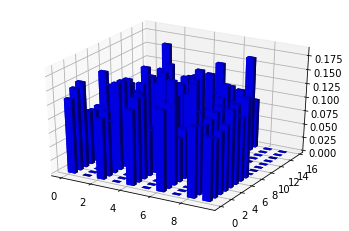

In [ ]:
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matrix = prob_arr_10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos = [range(matrix.shape[0])]
ypos = [range(matrix.shape[1])]
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = matrix.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

In [ ]:
def test_circuit():
  num_qubits = 3
  qreg_q = QuantumRegister(num_qubits + 1, 'node + coin')
  creg_c = ClassicalRegister(num_qubits, 'node')
  circuit = circuit_creation(num_qubits = 3)
  circuit = quantum_walk(circuit, num_qubits = 3, num_vertices = 6, time_step = 2)
  # circuit.measure(qreg_q[0:num_qubits], creg_c[:])
  circuit.draw('text', scale = 0.25, plot_barriers = False, fold = -1)

  return circuit

x = test_circuit()
x.draw('text', scale = 0.25, plot_barriers = False, fold = -1)

┌───┐               ┌───┐┌───┐          ┌───┐     ┌───┐          ┌───┐                                                            ┌───┐               ┌───┐┌───┐          ┌───┐     ┌───┐          ┌───┐                                                  
node + coin_0: ──────────┤ X ├───────────────┤ X ├┤ X ├───────■──┤ X ├─────┤ X ├──────────┤ X ├──────────────────────────────────────────■─────────────────┤ X ├───────────────┤ X ├┤ X ├───────■──┤ X ├─────┤ X ├──────────┤ X ├──────────────────────────────────────────■───────
                         └─┬─┘┌───┐          └─┬─┘└───┘     ┌─┴─┐└───┘     └─┬─┘┌───┐     └─┬─┘┌───┐     ┌───┐                         ┌─┴─┐               └─┬─┘┌───┐          └─┬─┘└───┘     ┌─┴─┐└───┘     └─┬─┘┌───┐     └─┬─┘┌───┐     ┌───┐                         ┌─┴─┐     
node + coin_1: ────────────■──┤ X ├────────────■────────────┤ X ├────────────■──┤ X ├───────■──┤ X ├─────┤ X ├─────────────────────────┤ X ├─────────────────■──┤ X ├────────────■────────────┤ X ├────────────■──┤ X ├───────■──┤ X ├─────┤ X ├─────────────────────────┤ X ├─────
                           │  └─┬─┘┌───┐┌───┐  │  ┌───┐┌───┐└─┬─┘┌───┐┌───┐  │  ├───┤┌───┐  │  ├───┤┌───┐└─┬─┘┌───┐     ┌───┐          └─┬─┘                 │  └─┬─┘┌───┐┌───┐  │  ┌───┐┌───┐└─┬─┘┌───┐┌───┐  │  ├───┤┌───┐  │  ├───┤┌───┐└─┬─┘┌───┐     ┌───┐          └─┬─┘     
node + coin_2: ────────────■────■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├─────┤ X ├────────────■───────────────────■────■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├─────┤ X ├────────────■───────
                    ┌───┐  │    │  └─┬─┘└───┘  │  └───┘└───┘  │  └───┘└───┘  │  ├───┤└───┘  │  ├───┤├───┤  │  ├───┤┌───┐└─┬─┘┌───┐┌───┐  │  ┌───┐     ┌───┐  │    │  └─┬─┘└───┘  │  └───┘└───┘  │  └───┘└───┘  │  ├───┤└───┘  │  ├───┤├───┤  │  ├───┤┌───┐└─┬─┘┌───┐┌───┐  │  ┌───┐
node + coin_3: ─|0>─┤ H ├──■────■────■─────────■──────────────■──────────────■──┤ X ├───────■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├─|0>─┤ H ├──■────■────■─────────■──────────────■──────────────■──┤ X ├───────■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├
                    └───┘                                                       └───┘          └───┘└───┘     └───┘└───┘     └───┘└───┘     └───┘     └───┘                                                       └───┘          └───┘└───┘     └───┘└───┘     └───┘└───┘     └───┘
 node_state: 3/════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

In [ ]:
def logistic_sine_map(length, initial_seed, lambdna):
  

In [ ]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 8192

# Load local account information
IBMQ.load_account()
# Get the least busy backend
# provider = IBMQ.get_provider(hub='ibm-q')
# backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
#                                        and not x.configuration().simulator 
#                                        and x.status().operational==True))

print("least busy backend: ", backend)
# Run our circuit
# t_qc = transpile(circuit, backend, optimization_level=3)
# qobj = assemble(t_qc, shots = shots)
# job = backend.run(qobj)

ibmqfactory.load_account:WARNING:2021-07-06 12:25:26,863: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmqx2


In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

In [ ]:
result = job.result()
plot_histogram(result.get_counts(circuit))
# print(result.get_counts(circuit))